### 6.2 Weight Initialization

In [17]:
"""
6.2.1 Zero Initialization
It would be inefficient to have all weights to be initialized to 0
Should they all be initialized to 0, the learning will not be performed.
All weight be will updated in equally upon propagation, therefore defies the purpose of having a variety of weights

6.2.2 Distribution of activations in the Hidden Layer
"""
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/ (1 + np.exp(-x))

def get_activation(std):    
    x = np.random.randn(1000, 100) # 1000 data
    node_num = 100                 # no. nodes in each hidden layer
    hidden_layer_size = 5          # no. of hidden layer
    activations = {}               # save activation values

    for i in range(hidden_layer_size):
        if i != 0:
            x = activations[i-1]

        w = np.random.randn(node_num, node_num) * std
        a = np.dot(x, w)
        z = sigmoid(a)
        activations[i] = z
    return activations

def plot_hist(std):
    activations = get_activation(std)

    for indx, a in activations.items():
        plt.subplot(1, len(activations), indx+1)
        plt.title(str(indx+1) + "-layer")
        plt.hist(a.flatten(), 30, range = (0, 1))

    plt.show()

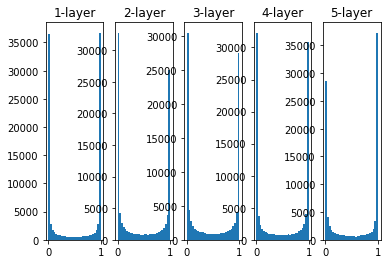

In [18]:
"""
When standard deviation is 1, sigmoid function outputs 0, 
which then leads its derivative to be 0(nearly). 

When data distribution is strongly geared towards either 0 or 1, then gradient of the backpropagation will gradually decrease 
and will eventually diminish.

This is called the "gradient vanishing" problem
"""
plot_hist(std = 1)

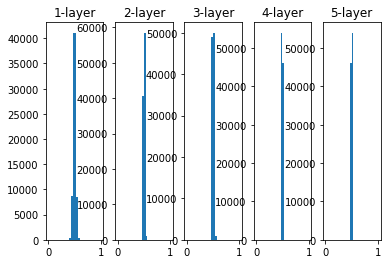

In [19]:
"""
When standard deviation is 0.01, unlike when it was 1, it does not have tendency to gear towards 0, or 1.
and therefore there is no "gradient vanishing" problem. 
However, the distribution is still concentrated near 0.5, and therefore have limited representation
"""
plot_hist(std = 0.01)

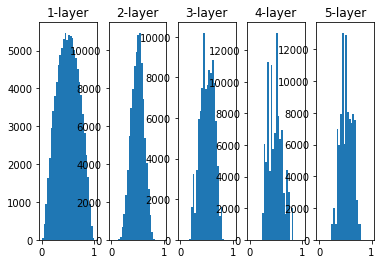

In [24]:
"""
Xavier initilization

std = 1 / 1/√n
n : number of nodes in the previous layer

the output is well distributed, and therefore have better representation power than the examples above

NOTE : 층이 깊어지면 일그러지는 현상은 sigmoid 함수 대신 tanh(쌍곡선 함수)를 이용하면
개선된다. tanh 함수도 S자 곡선이지만 (0, 0.5)에서 대칭인 시그모이드와는 다르게 원점 대칭이다.
활성화 함수용으로는 원점에서 대칭인 함수가 바람직하다고 알려져 있다.
"""
def get_xavier_activation():    
    x = np.random.randn(1000, 100) # 1000 data
    node_num = 100                 # no. nodes in each hidden layer
    hidden_layer_size = 5          # no. of hidden layer
    activations = {}               # save activation values

    for i in range(hidden_layer_size):
        if i != 0:
            x = activations[i-1]

        w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
        a = np.dot(x, w)
        z = sigmoid(a)
        activations[i] = z
    return activations

def plot_xavier_hist():
    activations = get_xavier_activation()

    for indx, a in activations.items():
        plt.subplot(1, len(activations), indx+1)
        plt.title(str(indx+1) + "-layer")
        plt.hist(a.flatten(), 30, range = (0, 1))

    plt.show()
    
plot_xavier_hist()

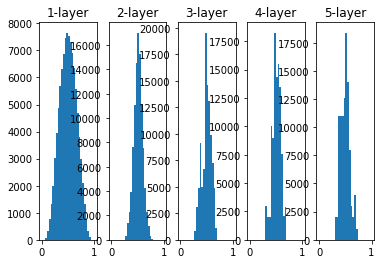

In [25]:
"""
6.2.3 ReLU

The examples we have done above were under the condition that the activation used in the model is a linear one (sigmoid, tanh), 
which has a symmetrical on x-axis

Therefore in order to use alternative (ReLU) it would require different types of activation (He Activation)

He intialization : std = 1 / √(2/n)
n : no. of nodes in the previous layer

ReLU는 음수가 0이므로 더 넓게 퍼트리기 위해 계수가 2배여야 한다고 해석할 수 있다.

ReLU를 사용한 경우, 0.01, xavier, He를 사용했을 때
0.01은 활성화 값이 아주 작아 기울기 소실이 발생하며
Xavier는 층이 깊어질 수록 치우침이 커진다.
He는 모든 층에서 균일하게 분포되었다.
"""
def get_he_activation():    
    x = np.random.randn(1000, 100) # 1000 data
    node_num = 100                 # no. nodes in each hidden layer
    hidden_layer_size = 5          # no. of hidden layer
    activations = {}               # save activation values

    for i in range(hidden_layer_size):
        if i != 0:
            x = activations[i-1]

        w = np.random.randn(node_num, node_num) / np.sqrt(2 * node_num)
        a = np.dot(x, w)
        z = sigmoid(a)
        activations[i] = z
    return activations

def plot_he_hist():
    activations = get_he_activation()

    for indx, a in activations.items():
        plt.subplot(1, len(activations), indx+1)
        plt.title(str(indx+1) + "-layer")
        plt.hist(a.flatten(), 30, range = (0, 1))

    plt.show()
    
plot_he_hist()

In [26]:
# 6.2.4 MNIST 데이터셋으로 본 가중치 초깃값 비교
"""
weight_init_compare.pt 참고.
층별 뉴런 수가 100개인 5층 신경망에서 ReLU함수를 사용.
std=0.01일 경우 학습이 전혀 이뤄지지 않는다.(순전파 때 너무 0으로 밀집한 작은 값이 흐르기 때문.
그로인해 역전파 때의 기울기도 작아져 가중치가 거의 갱신되지 않는다.)
Xavier와 He의 경우는 순조롭게 학습되고 있다.(진도는 He가 더 빠르다.)
"""

'\nweight_init_compare.pt 참고.\n층별 뉴런 수가 100개인 5층 신경망에서 ReLU함수를 사용.\nstd=0.01일 경우 학습이 전혀 이뤄지지 않는다.(순전파 때 너무 0으로 밀집한 작은 값이 흐르기 때문.\n그로인해 역전파 때의 기울기도 작아져 가중치가 거의 갱신되지 않는다.)\nXavier와 He의 경우는 순조롭게 학습되고 있다.(진도는 He가 더 빠르다.)\n'